# SWMAL Exercise

## Generalization Error

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]), that pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


### Qa) On Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

Training error: Også kendt som in-sample-fejl, måler, hvor godt en maskinlæringsmodel passer til træningsdataene. Det hjælper med at evaluere, hvor præcist modellen forudsiger dataene(trænede data). Træningsfejl på figuren antyder, at modellen passer godt til træningsdataene, men den kan have svært ved at generalisere til nye, usete data. Høj træningsfejl kan indikere, at modellen underanvender dataene og har udfordringer med at håndtere forskellige datasæt

Generlization error: Også kendt som out-of-sample-fejl, måler modellens evne til at forudsige data, som den ikke har set under træning. En lav generaliseringsfejl som kan også ses på figuren indikerer, at modellen kan håndtere nye og usete data nøjagtigt og effektivt. Men når generaliseringsfejlen kommer op, betyder det, at modellen ikke er i stand til at håndtere nye data korrekt, hvilket kan skyldes overfitting på træningsdataene. Generaliseringsfejl er afgørende for at vurdere en models evne til at fungere i den virkelige verden og undgå over- eller underfitting


Overfitting og Underfitting Zone:Overfitting sker, når en model er for kompleks og tilpasses træningsdata nøjagtigt. Dette resulterer i en dyb dal i træningsfejl på grafen, men samtidig stiger genereringsfejlen, hvilket skaber en stor kløft mellem de to linjer. Underfitting opstår, når en model er for simpel og ikke håndterer træningsdata ordentligt, hvilket fører til lav træningsfejl, men høj generaliseringsfejl. Målet er at finde det ideelle punkt på grafen, hvor begge fejl er lave, hvilket indikerer, at modellen er afbalanceret i kompleksitet og præcision og kan generalisere effektivt til nye data.

lOptimal kapacitet for en maskinlæringsmodel, som ses på grafen, repræsenterer det ideelle punkt, hvor træningsfejl og genereringsfejl er begge lave. Dette punkt repræsenterer den rette balance mellem modelkompleksitet og præcision. Modellen kan tilpasse sig træningsdataene effektivt og samtidig håndtere nye og ukendte data nøjagtigt. Når modellen arbejder ved optimal kapacitet, undgår den både underfitting, hvor den ikke udnytter træningsdataene, og overfitting, hvor den tilpasser sig træningsdataene for nøjagtigt og mister evnen til generalisering. At identificere og opnå denne optimale kapacitet er det centrale mål for enhver maskinlæringsmodel


Generalisering gap, som også kan observeres på grafen, refererer til forskellen mellem træningsfejl og generaliseringsfejl i en maskinlæringsmodel. Når dette gab er stort, indikerer det en uønsket situation, hvor modellen præsterer godt på træningsdataene, men præsterer dårligt på nye data. Dette er ofte resultatet af overfitting, hvor modellen har tilpasset sig træningsdataene for præcist og har svært ved at håndtere variation og usikkerhed i nye datasæt. For at opnå en effektiv maskinlæringsmodel er målet at minimere generaliseringsgabet og opnå en balance mellem trænings- og genereringsfejl, hvilket repræsenterer modellens evne til at præstere både på trænings- og ukendte data


I grafen, hvor x-aksen repræsenterer "kapacitet" eller modelkompleksitet, og y-aksen repræsenterer "fejl," kan vi observere, hvordan disse to faktorer interagerer. Når modelkompleksiteten øges, dvs. når vi går mod højre på x-aksen, kan vi se en tendens til, at træningsfejlen falder gradvist, da modellen passer nøjagtigt til træningsdataene. Dette er repræsenteret som en dyb dal i grafen. Men på samme tid stiger generaliseringsfejlen, hvilket skaber en kløft mellem de to linjer. Dette indikerer, at modellen begynder at overtilpasse træningsdataene og har svært ved at håndtere nye data, hvilket resulterer i højere fejl. På den anden side, når modelkompleksiteten er meget lav, dvs. modellen er meget simpel, er både trænings- og genereringsfejlen lave, men genereringsfejlen er stadig høj. Det ideelle punkt i grafen er der, hvor trænings- og generaliseringsfejlen er lave samtidig, og det repræsenterer den rette balance mellem modelkompleksitet og præcision. Dette punkt er det, vi stræber efter at opnå for en effektiv maskinlæringsmodel.



### Qb A MSE-Epoch/Error Plot

Next, we look at a SGD model for fitting polynomial, that is _polynomial regression_ similar to what Géron describes in [HOML] ("Polynomial Regression" + "Learning Curves"). 

Review the code below for plotting the RMSE vs. the iteration number or epoch below (three cells, part I/II/III). 

Write a short description of the code, and comment on the important points in the generation of the (R)MSE array.

The training phase output lots of lines like 

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
> `epoch= 105, mse_train=1.49, mse_val=2.35`

What is an ___epoch___ and what is `mse_train` and `mse_val`?

NOTE$_1$: the generalization plot figure 5.3 in [DL] (above) and the plots below have different x-axis, and are not to be compared directly!

NOTE$_2$: notice that a 90 degree polynomial is used for the polynomial regression. This is just to produce a model with an extremly high capacity.

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


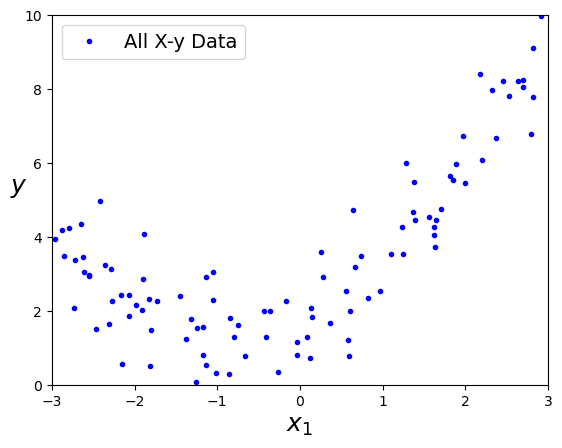

OK


In [1]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

In [4]:
def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=", n_epochs)

    train_errors, val_errors = [], []  # Initialize empty lists for train and validation errors

    sgd_reg = SGDRegressor(
        max_iter=1,
        penalty=None,
        eta0=0.0005,
        warm_start=True,
        early_stopping=False,
        learning_rate="constant",
        tol=None,  # Set 'tol' to None to disable early stopping
        random_state=42
    )

    for epoch in range(n_epochs):
        sgd_reg.fit(X_train, y_train)

        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict = sgd_reg.predict(X_val)

        mse_train = mean_squared_error(y_train, y_train_predict)
        mse_val = mean_squared_error(y_val, y_val_predict)

        train_errors.append(mse_train)
        val_errors.append(mse_val)  # Append values to train and validation errors
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')


Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

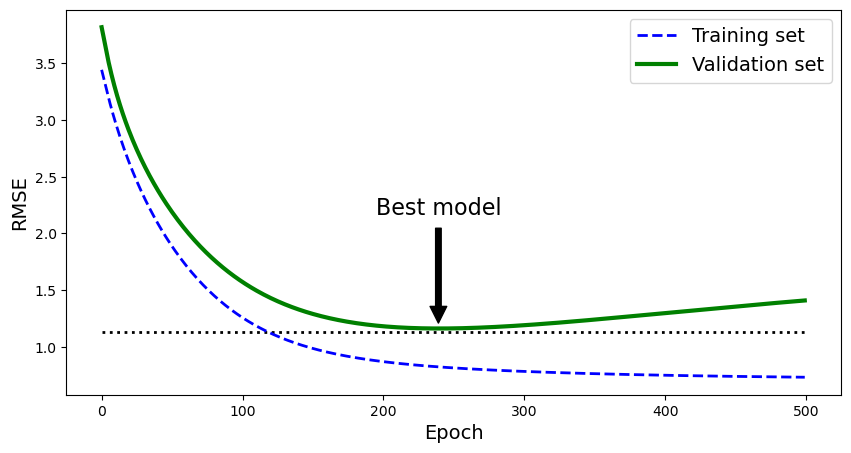

OK


In [5]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

In [ ]:
# TODO: code review..
assert False, "TODO: code review in text form"

### Qc)  Early Stopping

How would you implement ___early stopping___, in the code above? 

Write an explanation of the early stopping concept...that is, just write some pseudo code that 'implements' the early stopping. 

OPTIONAL: also implement your early stopping pseudo code in Python, and get it to work with the code above (and not just flipping the hyperparameter to `early_stopping=True` on the `SGDRegressor`).

In [ ]:
# TODO: early stopping..
assert False, "TODO: explain early stopping"

### Qd) Explain the Polynomial RMSE-Capacity plot

Now we revisit the concepts from `capacity_under_overfitting.ipynb` notebook and the polynomial fitting with a given capacity (polynomial degree).

Peek into the cell below (code similar to what we saw in `capacity_under_overfitting.ipynb`), and explain the generated RMSE-Capacity plot. Why does the _training error_ keep dropping, while the _CV-error_ drops until around capacity 3, and then begin to rise again?

What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10? Relate this with what you found via Qa+b in `capacity_under_overfitting.ipynb`.

In [ ]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

In [ ]:
# TODO: investigate..
assert False, "TODO: ...answer in text form"

REVISIONS||
:-|:-
2018-12-19| CEF, initial.                  
2018-02-14| CEF, major update and put in sync with under/overfitting exe.         
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, minor text updates, and made Qc optional.
2018-02-25| CEF, updated code, made more functions.
2018-03-11| CEF, corrected RSME to RMSE.
2019-10-08| CEF, updated to ITMAL E19.
2020-03-14| CEF, updated to ITMAL F20.
2020-10-15| CEF, updated to ITMAL E20.
2020-11-17| CEF, added comment on 90 degree polynomial, made early stopping a pseudo code exe.
2021-03-22| CEF, changed crossref from "capacity_under_overfitting.ipynb Qc" to Qa+b in QdExplain the Polynomial RMSE-Capacity Plot. 
2021-03-23| CEF, changed 'cv RMSE' legend to 'validation RMSE'.
2021-10-31| CEF, updated to ITMAL E21.
2022-03-25| CEF, updated to SWMAL F22.
2023-03-16| CEF, minor update to SWMAL F23.